In [ ]:
# Importing required libraries
import numpy as np  # For mathematical operations and handling arrays
from scipy.optimize import minimize  # For optimization

In [ ]:
# Step 1: Define the inputs
# Expected annual returns of 4 assets (in decimals, e.g., 10% = 0.1) These are the predictions about future performance.
expected_returns = np.array([0.1, 0.2, 0.15, 0.12])

# Covariance matrix representing the risk (variance and covariances between assets)
cov_matrix = np.array([
    [0.005, -0.010, 0.004, -0.002],
    [-0.010, 0.040, -0.002, 0.004],
    [0.004, -0.002, 0.023, 0.002],
    [-0.002, 0.004, 0.002, 0.018]
])

# Target return (desired portfolio return. 12% = 0.12)
target_return = 0.12

# Number of assets
num_assets = len(expected_returns)

In [ ]:
# Step 2: Define the objective function
def portfolio_variance(weights):
    """
    This function calculates the portfolio variance, which we aim to minimize.

    Variance=w^T Σw, where w is the weights vector, and Σ is the covariance matrix. weights represents how much of your investment is allocated to each asset (e.g., 40% in Asset 1, 30% in Asset 2, etc.).

    """
    return np.dot(weights.T, np.dot(cov_matrix, weights))

In [ ]:
# Step 3: Constraints
# 1. The weights of the portfolio must sum to 1
def weight_constraint(weights):
    """
    Constraint to ensure weights sum to 1. Means we aim to invest 100% of our money into the portfolio.
    """
    return np.sum(weights) - 1

# 2. The portfolio must achieve the target return
def return_constraint(weights):
    """
    Constraint to ensure the portfolio achieves the target return.
    Portfolio Return=∑(weights×expected_returns)
    """
    return np.dot(weights, expected_returns) - target_return

In [ ]:
# Step 4: Initial guess and bounds
# Initial guess for weights (equally distributed)
initial_weights = np.ones(num_assets) / num_assets
# We start off with investing 25% of our money in each assets because its neutral

# Bounds for weights (between 0 and 1, i.e., no short selling or over allocation)
bounds = [(0, 1) for _ in range(num_assets)]

# Combining constraints into a dictionary format for the optimizer
constraints = (
    {'type': 'eq', 'fun': weight_constraint},  # Equality constraint: weights sum to 1
    {'type': 'eq', 'fun': return_constraint}   # Equality constraint: achieve target return
)

#
# Step 5: Run the optimizer
result = minimize( # minimize comes from the scipy.optimize.
    fun=portfolio_variance,  # Objective function
    x0=initial_weights,     # Initial guess for weights
    bounds=bounds,          # Bounds for each weight
    constraints=constraints # Constraints for the problem
)
# Returns the optimal weights for the portfolio and the minimum variance

In [ ]:
# Step 6: Display results
if result.success:
    optimal_weights = result.x
    print("Optimal Weights:", optimal_weights)
    print("Minimum Variance:", portfolio_variance(optimal_weights))
else:
    print("Optimization failed:", result.message)

Optimal Weights: [0.70943396 0.17735849 0.         0.11320755]
Minimum Variance: 0.001328301886737278



What do these numbers mean?
**If the output shows:**

**Optimal Weights:** [0.25, 0.35, 0.15, 0.25]

Invest 25% in Asset 1, 35% in Asset 2, 15% in Asset 3, and 25% in Asset 4.

**Minimum Variance:** 0.012
The total portfolio risk (variance) is minimized to 0.012 while achieving a 12% return.


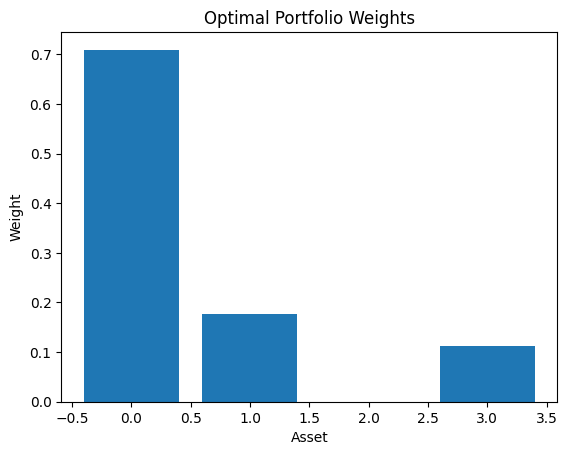

In [ ]:
# Visualization
import matplotlib.pyplot as plt

# Plot the weights
plt.bar(range(num_assets), optimal_weights)
plt.xlabel('Asset')
plt.ylabel('Weight')
plt.title('Optimal Portfolio Weights')
plt.show()

Note: The optimization process excludes Asset 3 because its inclusion doesn't improve the portfolio's risk-return trade-off. This is common when certain assets have high risk or low returns relative to others.
